### 3-parameter exponential fitted $\beta$-scaling

Want to fit observable data as a function of $\beta$ to the form:
$$
\mathcal{O}(\beta) = \mathcal{O}_{\beta\to\infty} + C_1 e^{-C_2 \beta}
$$

where $\mathcal{O}_{\beta\to\infty}$,$C_1$, and $C_2$ are fitting parameters. The $\mathcal{O}_{\beta\to\infty}$ parameter will give a large $\beta$ extrapolation of the observable in question. Here, we will focus on the second Rényi entanglement entropy $S_2$.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import optimize

Define the exponential model

In [45]:
def exponential(x, c1, c2, c3):
    return c3 + c1*np.exp(-x*c2)

Feed data points (obtained from a separate script)

In [46]:
# Define data points
x_array = np.array([3.0,4.0,6.0,8.0])
y_array_exp = np.array([1.730056748108533, 1.6868264766613954, 1.6461340604013672, 1.630047060518235])


In [47]:
sigmas = np.array([0.0010607117818590029, 0.00020044954395468352, 0.0013130701859257526, 0.000312837152680006])

Text(0.5, 0, '$\\beta$')

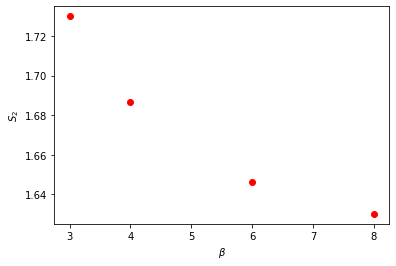

In [49]:
# Plot data
plt.plot(x_array,y_array_exp,'ro')
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")

Perform exponential fit to data with Scipy curve_fit

In [50]:
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, x_array, y_array_exp,sigma=sigmas,p0=[1,1,1.630047060518235])



In [51]:
# Extract fit parameters
c1,c2,c3 = popt_exponential

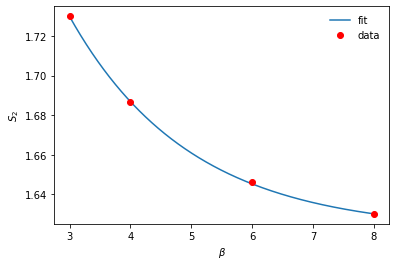

In [52]:
# Perform the fit
betas_fit = np.linspace(3,8,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.plot(x_array,y_array_exp,'ro',label='data')
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

plt.savefig("U0.5.png",dpi=300)

In [53]:
c3 = popt_exponential[2]
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

In [54]:
c3_err

0.0005263624546261718

In [55]:
np.diag(pcov_exponential)[0]**0.5

0.015853761080767255

In [56]:
print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

1.621418 +/- 0.000526


In [57]:
print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

1.621418 +/- 0.000526


# Repeat this analysis for all U/t values below the phase transition